In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [10]:
# Load the data
file_path = 'After Graphing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()

,Name,Affiliation,Followers,Date,Likes,Retweets,Replies,Views
0,SabbySabs2,Democratic Party,75700,"March 17, 2023 08:02 PM",934,73,343,48242
1,TristanSnell,Democratic Party,571900,"February 23, 2023 09:19 PM",5640,155,1930,128116
2,TristanSnell,Democratic Party,571900,"February 25, 2023 12:31 AM",3649,885,1790,150426
3,BernardKerik,Republican Party,328900,"September 11, 2023 09:51 AM",1014,83,262,33393
4,Jaybefaunt,Republican Party,54500,"January 28, 2023 08:25 AM",225,10,73,5316


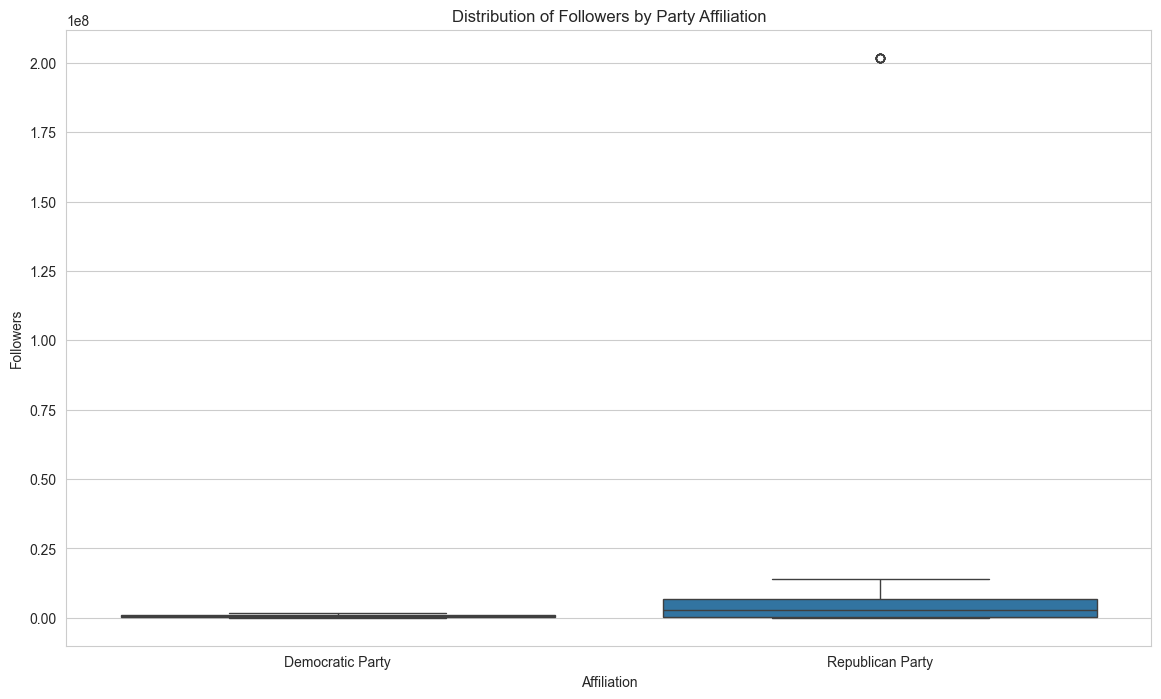

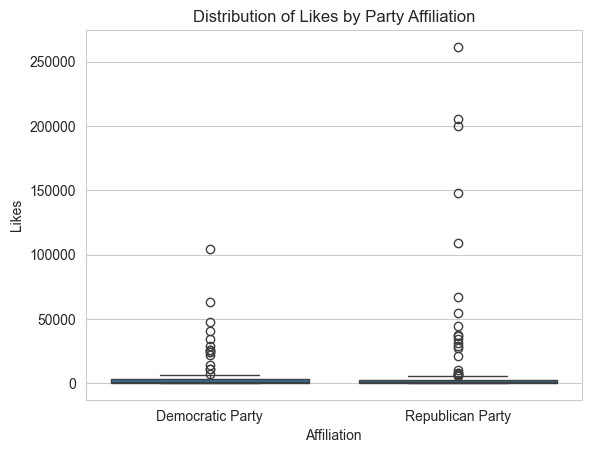

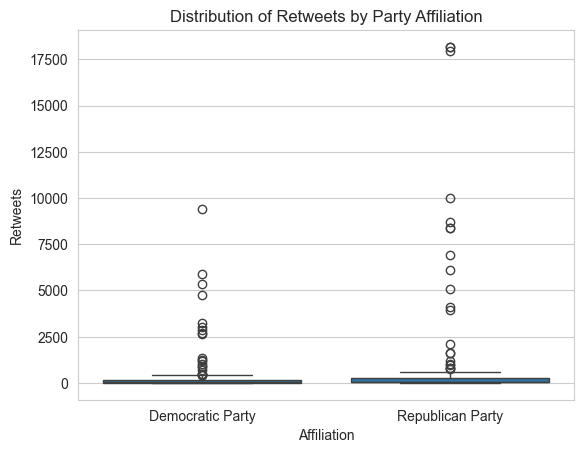

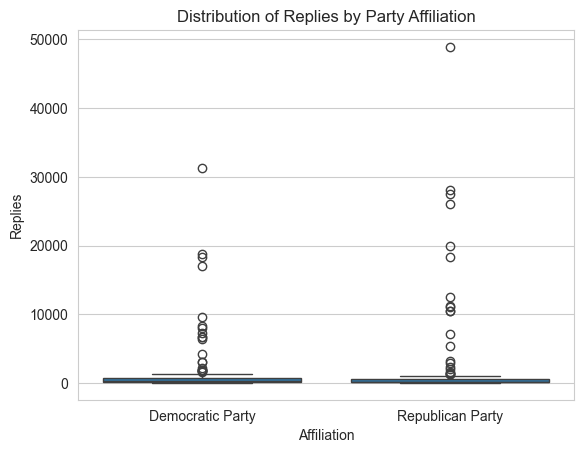

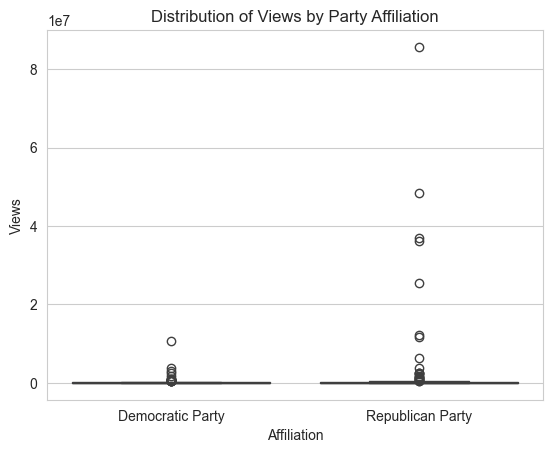

In [11]:
# Set the style for the plots
sns.set_style('whitegrid')

# Convert numeric columns to integers for plotting
data['Followers'] = pd.to_numeric(data['Followers'], errors='coerce')
data['Likes'] = pd.to_numeric(data['Likes'], errors='coerce')
data['Retweets'] = pd.to_numeric(data['Retweets'], errors='coerce')
data['Replies'] = pd.to_numeric(data['Replies'], errors='coerce')
data['Views'] = pd.to_numeric(data['Views'], errors='coerce')

# Filter out the "Other" category
filtered_data = data[data['Affiliation'].isin(['Democratic Party', 'Republican Party'])]

# Plot data by affiliation
plt.figure(figsize=(14, 8))
metrics = ['Followers', 'Likes', 'Retweets', 'Replies', 'Views']
for metric in metrics:
    sns.boxplot(x='Affiliation', y=metric, data=filtered_data)
    plt.title(f'Distribution of {metric} by Party Affiliation')
    plt.show()

In [12]:
# Filter out the "Other" category
filtered_data = data[data['Affiliation'].isin(['Democratic Party', 'Republican Party'])]

# Clean data: ensure all metric columns have valid numeric values
for metric in metrics:
    filtered_data[metric] = pd.to_numeric(filtered_data[metric], errors='coerce')

# Remove rows with NaN values in any of the metric columns
filtered_data = filtered_data.dropna(subset=metrics)

#Define custom colors
custom_palette = {'Democratic Party': 'dodgerblue', 'Republican Party': 'red'}

# Plot density plots for each metric
for i, metric in enumerate(metrics):
    plt.figure(figsize=(16, 10))
    # plt.subplot(len(metrics), 1, i + 1)
    sns.kdeplot(data=filtered_data, x=metric, hue='Affiliation', fill=True, common_norm=False, alpha=0.5, palette=custom_palette)
    plt.title(f'Density Plot of {metric} by Party Affiliation One Year After Oct 7th, 2023')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.grid(True)  # Add grid for better visualization
    # plt.tight_layout()
    plt.savefig(f'After_density_plot_{metric}.png', dpi= 300, bbox_inches='tight') # Save the plot as a PNG file 
    plt.close() # Close the plot to free up memory

/var/folders/wl/yn_f16552qvcz999s7pwv5sm0000gn/T/ipykernel_45943/4078470670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[metric] = pd.to_numeric(filtered_data[metric], errors='coerce')
